## Centroid Models Assignment

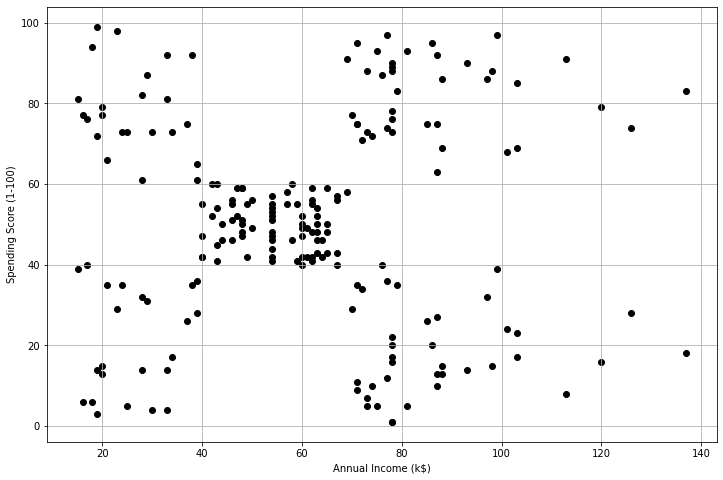

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt



# Load dataframe
df = pd.read_csv('https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv')


def exploredataframe(data):
    print("\n===Data Types :=== \n" + str(data.dtypes))
    print("=======================")
    print("\n\n\n Data Describe :\n" + str(data.describe()))
    print("=======================")
    # print("\nData is null  \n"+str(data.isnull()))
    print("\\n\n\n Data is null SUM \n" +str( data.isnull().sum())) #looks at the values inside.
    print("\n Data is null count \n" +str(data.count())) # looks at columns avaiable, doesnt care if i
    missing_values = data.isnull().sum().sort_values(ascending=False)
    percent_of_missing_values = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data= pd.concat([missing_values,percent_of_missing_values], axis=1, keys=['Total','Percent'])
    print("=======================")
    print("\\n\n\n Mising Data " + str(missing_data.head(20)))
    print("=======================")



    print(set(df['Genre']))
obj_df = df.select_dtypes(include=['object']).copy()
newfeature=pd.get_dummies(obj_df, columns=["Genre"])
newfeature


df=df.drop(['Genre'], axis=1)
# print(df)

result = pd.concat([df, newfeature], axis=1)
result

# result=result.drop(['Genre'], axis=1)
result=result.drop(['CustomerID'], axis=1)


# added bins earlier, but wont be required 
bins = [0, 25, 35, 45, 55, 65, 100]
result['binned'] = pd.cut(result['Age'], bins).astype(str)
binned=result.drop(['Age'], axis=1)
# print(binned)

binned['binned'].unique()


# print(binned)

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
plt.scatter(binned.iloc[: , 0],
            binned.iloc[: , 1],
            c='black',
            marker='o')
plt.xlabel("Annual Income (k$)"),
plt.ylabel("Spending Score (1-100)")
plt.grid()
plt.show()





**Take some time to explore the dataframe above.**

----------------------
## Objective: 
#### 1. Fit K-Means, 
#### 2. Find the optimal number of clusters using the elbow rule and plot the clusters.


It may be difficult to visualize clusters on dataframes with many features. To simplify the task, we can plot the clusters in 2-D, by creating a clustering model on the last two columns of the dataset. 

> **Note:** There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though it's **not a must** in the case because we take only the last two columns, and they have already have similar scale.


In [2]:
#bins not required, so dropping them
binned=result.drop(['binned'], axis=1)
X = binned.iloc[:, 1:5].values
print("Type of X " + str(type(X)))
print("Passing  \n"+str(X))




km = KMeans(n_clusters=5,
            n_init=10,
            random_state=0)

y_km = km.fit_predict(X) 
print(y_km)

# y_km = km.fit_predict(binned)

#heigh and weight 
#fit finds the weight of the formula ( fit (coeficient) times values feature + (fit ) bias ( is approximate ) )


Type of X <class 'numpy.ndarray'>
Passing  
[[ 15  39   0   1]
 [ 15  81   0   1]
 [ 16   6   1   0]
 [ 16  77   1   0]
 [ 17  40   1   0]
 [ 17  76   1   0]
 [ 18   6   1   0]
 [ 18  94   1   0]
 [ 19   3   0   1]
 [ 19  72   1   0]
 [ 19  14   0   1]
 [ 19  99   1   0]
 [ 20  15   1   0]
 [ 20  77   1   0]
 [ 20  13   0   1]
 [ 20  79   0   1]
 [ 21  35   1   0]
 [ 21  66   0   1]
 [ 23  29   0   1]
 [ 23  98   1   0]
 [ 24  35   0   1]
 [ 24  73   0   1]
 [ 25   5   1   0]
 [ 25  73   0   1]
 [ 28  14   1   0]
 [ 28  82   0   1]
 [ 28  32   1   0]
 [ 28  61   0   1]
 [ 29  31   1   0]
 [ 29  87   1   0]
 [ 30   4   0   1]
 [ 30  73   1   0]
 [ 33   4   0   1]
 [ 33  92   0   1]
 [ 33  14   1   0]
 [ 33  81   1   0]
 [ 34  17   1   0]
 [ 34  73   1   0]
 [ 37  26   1   0]
 [ 37  75   1   0]
 [ 38  35   1   0]
 [ 38  92   0   1]
 [ 39  36   0   1]
 [ 39  61   1   0]
 [ 39  28   1   0]
 [ 39  65   1   0]
 [ 40  55   1   0]
 [ 40  47   1   0]
 [ 40  42   1   0]
 [ 40  42   1   0]
 [ 42 

- elbow rule

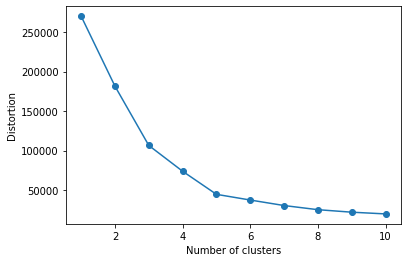

In [3]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

    # elbow rule
plot_distortion(X,max_clusters=10)

* fit model with optimal number of clusters

In [4]:
#already done previously

* define function plot_clusters

In [5]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    #for each cluster in the set of cluster {0, 1, 2, 3, 4}
  
    for cluster in set(y_res):
        # dataframe
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        print("X = In array binned.iloc[:, 1:5].values, for cluster {}, \n in set(y_res) {}\n".format(cluster, set(y_res)) + " returns this list of len {} \nList x{}".format(len(x),x))
        print("Y = In array binned.iloc[:, 1:5].values, for cluster {}, \n in set(y_res) {}\n".format(cluster, set(y_res)) + " returns this list of len {} \nList y{}".format(len(y),y))
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    # if plt_cluster_centers:
    #     plt.scatter(X_centroids,
    #                 Y_centroids,
    #                 marker='*',
    #                 c='red',
    #                 s=250,
    #                 label='centroids')
    plt.legend()
    plt.grid()
    plt.show()
    
 # plot clustering result

* plot clusters

X = In array binned.iloc[:, 1:5].values, for cluster 0, 
 in set(y_res) {0, 1, 2, 3, 4}
 returns this list of len 81 
List x[39 40 40 40 40 42 42 43 43 43 43 44 44 46 46 46 46 47 47 48 48 48 48 48
 48 49 49 50 50 54 54 54 54 54 54 54 54 54 54 54 54 57 57 58 58 59 59 60
 60 60 60 60 60 61 61 62 62 62 62 62 62 63 63 63 63 63 63 64 64 65 65 65
 65 67 67 67 67 69 71 72 76]
Y = In array binned.iloc[:, 1:5].values, for cluster 0, 
 in set(y_res) {0, 1, 2, 3, 4}
 returns this list of len 81 
List y[61 55 47 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59
 47 55 42 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49
 40 42 52 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43
 59 43 57 56 40 58 35 34 40]
X = In array binned.iloc[:, 1:5].values, for cluster 1, 
 in set(y_res) {0, 1, 2, 3, 4}
 returns this list of len 22 
List x[15 16 17 18 19 19 20 20 21 23 24 25 28 28 29 30 33 33 34 37 38 39]
Y = In array binned.iloc[:, 1:5].values, for cluster 1, 
 in set

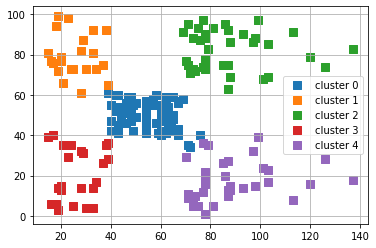

In [6]:


x=binned[binned.columns[1:3]]
# print(x)
# print(y_km)
plot_clusters(X,y_km,plt_cluster_centers=True)
